# Usando Monte Carlo para a Eficiência do Veículo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Funções Utilizadas

### Funções para Calcular as Emissões dos Gases de Efeito Estufa

In [ ]:
# Função para separar as quantidades de diesel e de biodiesel
def separa_combustivel_vet(Q, p):
  p_biodiesel = p
  Q_diesel, Q_biodiesel = np.zeros(len(Q)), np.zeros(len(Q))

  for i in range(len(Q)):
    Q_biodiesel[i] = Q[i] * p_biodiesel
    Q_diesel[i] = Q[i]*(1-p_biodiesel)

  return Q_diesel, Q_biodiesel

In [ ]:
def calcula_emissao_co2e(Q, p=0.14):
  F_diesel = np.array([2.603, 0.000138531163680, 0.000138531163680]) # fator de emissão de cada gás [0] CO2, [1] Ch4, [2] N2O
  F_biodiesel = np.array([2.431, 0.000331594560, 0.00001989567360])

  G = np.array([1,  28, 265]) # Potencial de aquecimento global

  resultados_emissao_co2e = []
  resultados_c02 = []
  resultados_ch4 = []
  resultados_n2o = []
  resultados_co2_biogenico = []

  Q_diesel, Q_biodiesel = separa_combustivel_vet(Q, p)

  # Calculando as emissões do diesel e do biodiesel
  for i in range(len(Q_diesel)):
    soma_co2 = 0
    soma_ch4 = 0
    soma_n2o = 0
    soma_co2_biogenico = 0
    total_co2e = 0

    soma_co2 += Q_diesel[i] * F_diesel[0]

    soma_ch4 += (Q_diesel[i] * F_diesel[1] + Q_biodiesel[i] * F_biodiesel[1])

    soma_n2o += (Q_diesel[i] * F_diesel[2] + Q_biodiesel[i] * F_biodiesel[2])

    soma_co2_biogenico += Q_biodiesel[i] * F_biodiesel[0]

    total_co2e +=  soma_co2 * G[0]   + soma_ch4 * G[1] + soma_n2o * G[2]


    resultados_emissao_co2e.append(total_co2e)

    resultados_co2_biogenico.append(soma_co2_biogenico)

    resultados_c02.append(soma_co2)

    resultados_ch4.append(soma_ch4)

    resultados_n2o.append(soma_n2o)

  return resultados_emissao_co2e, resultados_c02, resultados_ch4, resultados_n2o, resultados_co2_biogenico

### Função para Calcular os Resultados

In [ ]:
def retorna_max_min(resultado):
  max = np.max(resultado)
  min = np.min(resultado)

  return max, min

In [ ]:
def gera_resultado(distancia, eficiencia_combustivel):

  # Calcular consumo de combustível
  consumo_combustivel = distancia / eficiencia_combustivel

  # Cálculo de custos
  preco_combustivel = 5.9 # preço por litro de combustível
  custo_combustivel = consumo_combustivel * preco_combustivel

  # Calcular emissões usando a função calcula_emissoes_co2e
  emissoes_co2e, emissoes_co2, emissoes_ch4, emissoes_n2o, emissoes_co2_biogenico = calcula_emissao_co2e(consumo_combustivel)

  # Calcular valores máximo e mínimo
  max_eficiencia, min_eficiencia = retorna_max_min(eficiencia_combustivel)
  max_consumo, min_consumo = retorna_max_min(consumo_combustivel)
  max_custo, min_custo = retorna_max_min(custo_combustivel)
  max_co2e,  min_co2e = retorna_max_min(emissoes_co2e)
  max_co2, min_co2 = retorna_max_min(emissoes_co2)
  max_ch4, min_ch4 = retorna_max_min(emissoes_ch4)
  max_n2o, min_n2o = retorna_max_min(emissoes_n2o)
  max_co2_biogenico, min_co2_biogenico = retorna_max_min(emissoes_co2_biogenico)

  # Plotar os gráficos
  plt.figure(figsize=(25, 12))

  # Gráfico de Eficiência de Combustível
  plt.subplot(3, 3, 1)
  plt.hist(eficiencia_combustivel, bins=50, color='purple', alpha=0.7)
  plt.xlabel('Eficiência de Combustível (km/L)')
  plt.ylabel('Frequência')
  plt.title('Distribuição de Eficiência de Combustível\nMax: {:.2f} km/L, Min: {:.2f} km/L'.format(max_eficiencia, min_eficiencia))

  # Gráfico de Consumo de Combustível
  plt.subplot(3, 3, 2)
  plt.hist(consumo_combustivel, bins=50, color='blue', alpha=0.7)
  plt.xlabel('Consumo de Combustível (litros)')
  plt.ylabel('Frequência')
  plt.title('Distribuição de Consumo de Combustível\nMax: {:.2f} litros, Min: {:.2f} litros'.format(max_consumo, min_consumo))

  # Gráfico de Custo de Combustível
  plt.subplot(3, 3, 3)
  plt.hist(custo_combustivel, bins=50, color='green', alpha=0.7)
  plt.xlabel('Custo de Combustível (R\$)')
  plt.ylabel('Frequência')
  plt.title('Distribuição de Custo de Combustível\nMax: R\$ {:.2f}, Min: R\$ {:.2f}'.format(max_custo, min_custo))

  # Gráfico de Emissões de CO2 Equivalente
  plt.subplot(3, 3, 4)
  plt.hist(emissoes_co2e, bins=50, color='orange', alpha=0.7)
  plt.xlabel('Emissões de CO2 Equivalente (kg)')
  plt.ylabel('Frequência')
  plt.title('Distribuição de Emissões de CO2 Equivalente\nMax: {:.2f} kg, Min: {:.2f} kg'.format(max_co2e, min_co2e))

  # Gráfico de Emissões de CO2
  plt.subplot(3, 3, 5)
  plt.hist(emissoes_co2, bins=50, color='pink', alpha=0.7)
  plt.xlabel('Emissões de CO2 (kg)')
  plt.ylabel('Frequência')
  plt.title('Distribuição de Emissões de CO2 \nMax: {:.2f} kg, Min: {:.2f} kg'.format(max_co2, min_co2))

  # Gráfico de Emissões de CH4
  plt.subplot(3, 3, 6)
  plt.hist(emissoes_ch4, bins=50, color='cyan', alpha=0.7)
  plt.xlabel('Emissões de CH4 (kg)')
  plt.ylabel('Frequência')
  plt.title('Distribuição de Emissões de CH4\nMax: {:.2f} kg, Min: {:.2f} kg'.format(max_ch4, min_ch4))

  # Gráfico de Emissões de N2O
  plt.subplot(3, 3, 7)
  plt.hist(emissoes_n2o, bins=50, color='brown', alpha=0.7)
  plt.xlabel('Emissões de N2O (kg)')
  plt.ylabel('Frequência')
  plt.title('Distribuição de Emissões de N2O\nMax: {:.2f} kg, Min: {:.2f} kg'.format(max_n2o, min_n2o))

  # Gráfico de Emissões de N2O
  plt.subplot(3, 3, 8)
  plt.hist(emissoes_co2_biogenico, bins=50, color='lime', alpha=0.7)
  plt.xlabel('Emissões de CO2 Biogênico (kg)')
  plt.ylabel('Frequência')
  plt.title('Distribuição de Emissões de CO2 Biogênico\nMax: {:.2f} kg, Min: {:.2f} kg'.format(max_co2_biogenico, min_co2_biogenico))

  # Ajustar layout e mostrar os gráficos
  plt.tight_layout()
  plt.show()

## Obtendo os Resultados

Foram consideradas três distribuições para gerar os valores da eficiência do veículo: uniforme, triangular e normal.

In [ ]:
n_simulacoes = [100, 1000, 10000, 100000]

In [ ]:
n_simulacao = 100000

### Distruibuição Uniforme

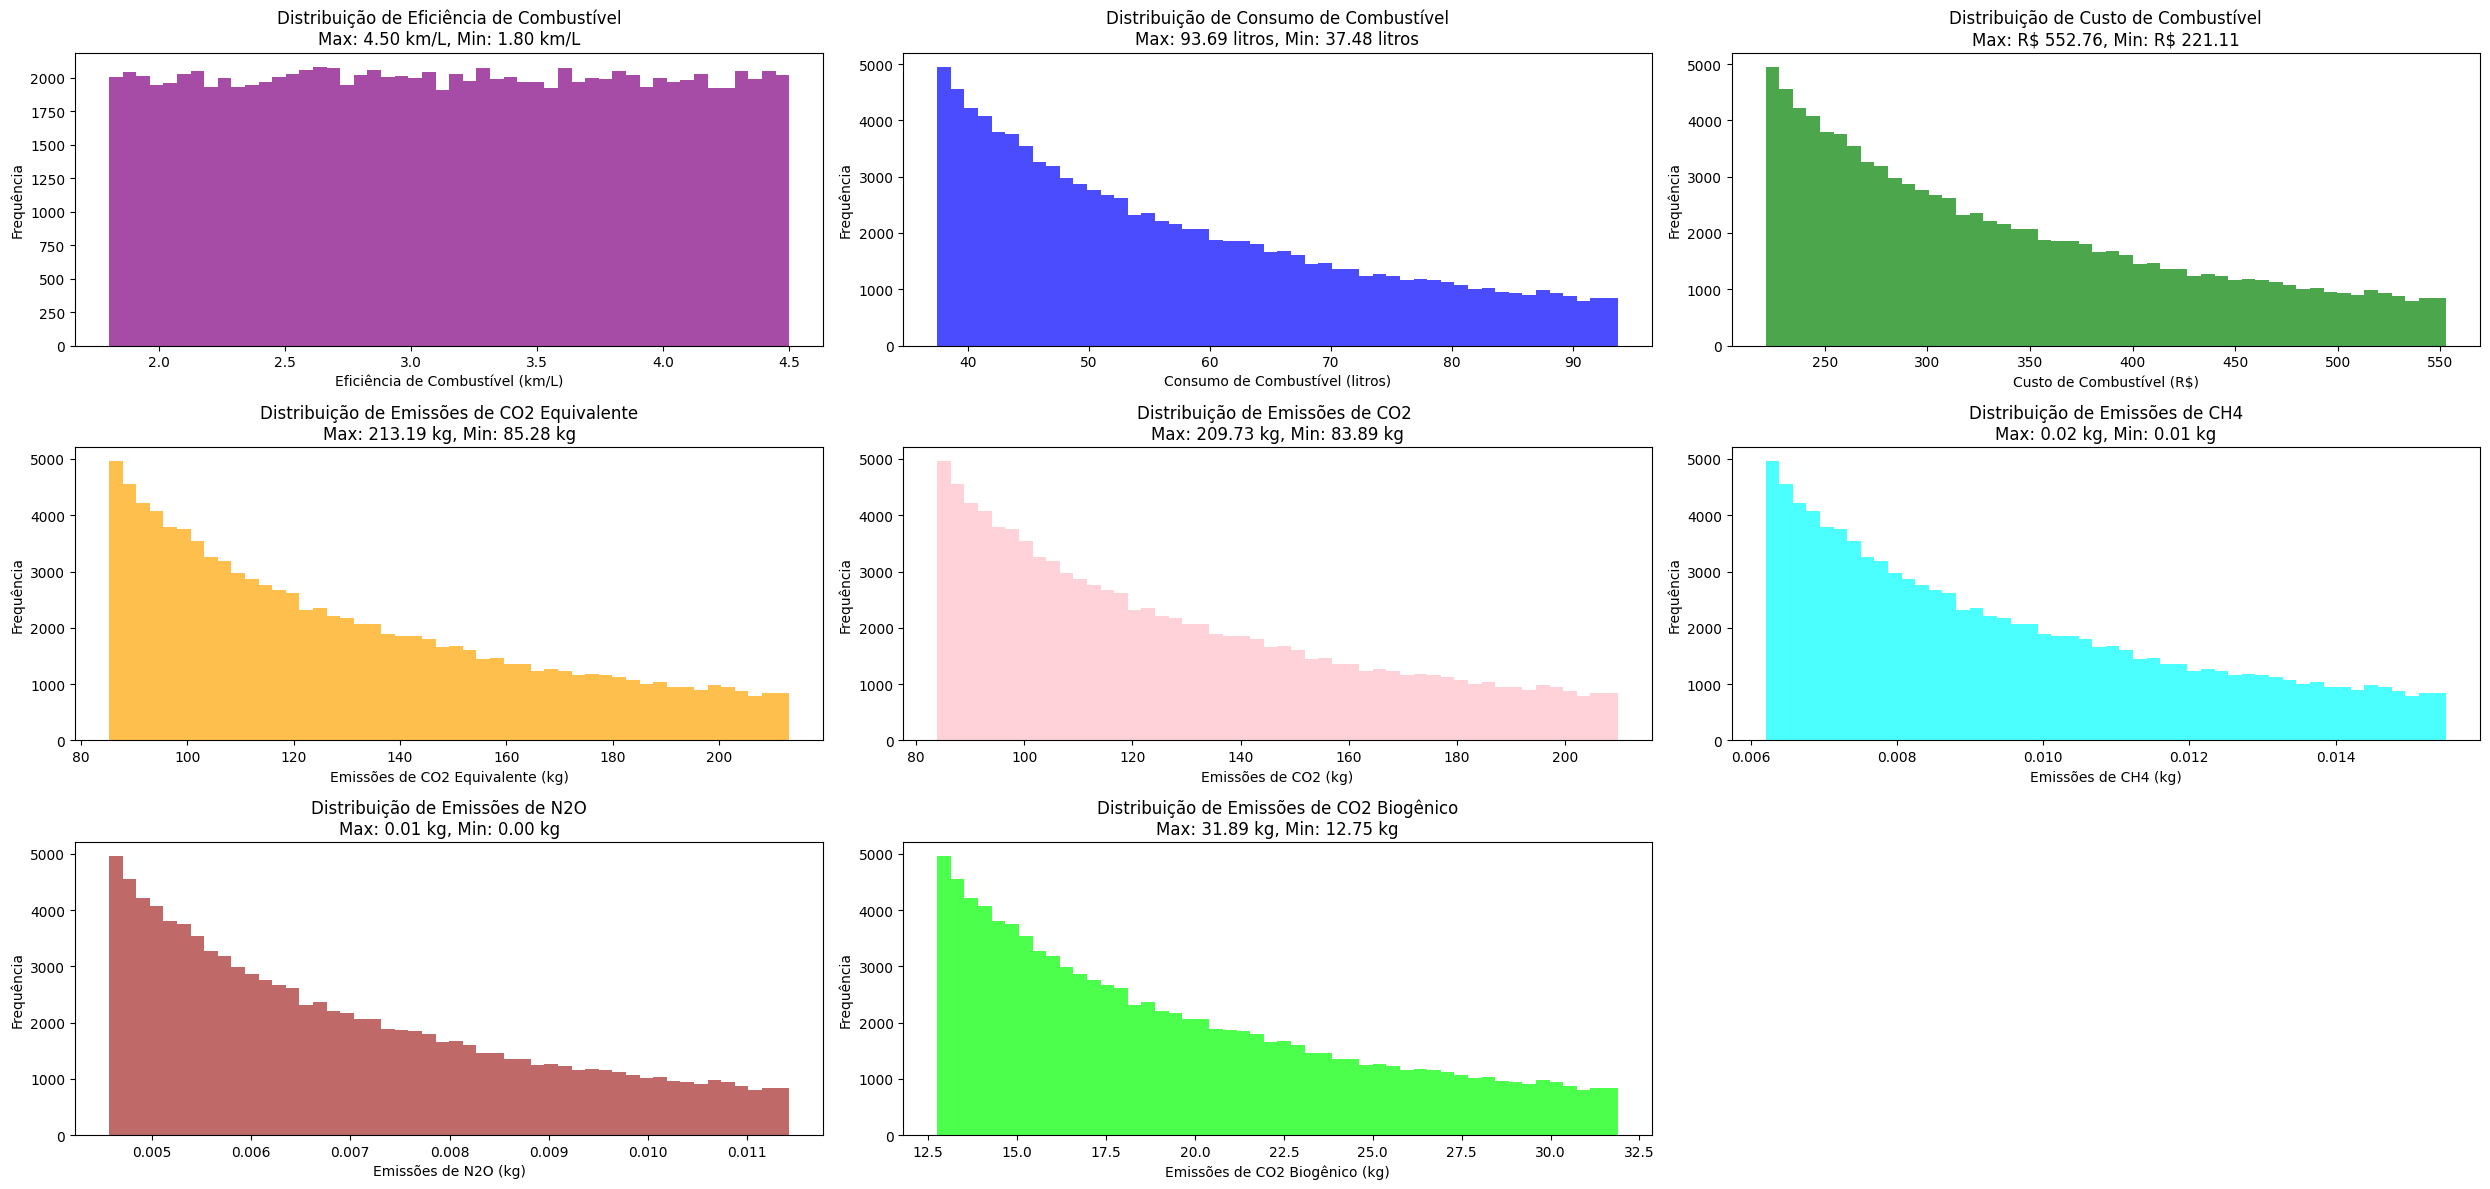

In [ ]:
 # Distribuição Uniforme
uniform_min, uniform_max = 1.8, 4.5

eficiencia_uniforme = np.random.uniform(uniform_min, uniform_max, n_simulacao)
gera_resultado(168.64,eficiencia_uniforme)

### Distribuição Triangular

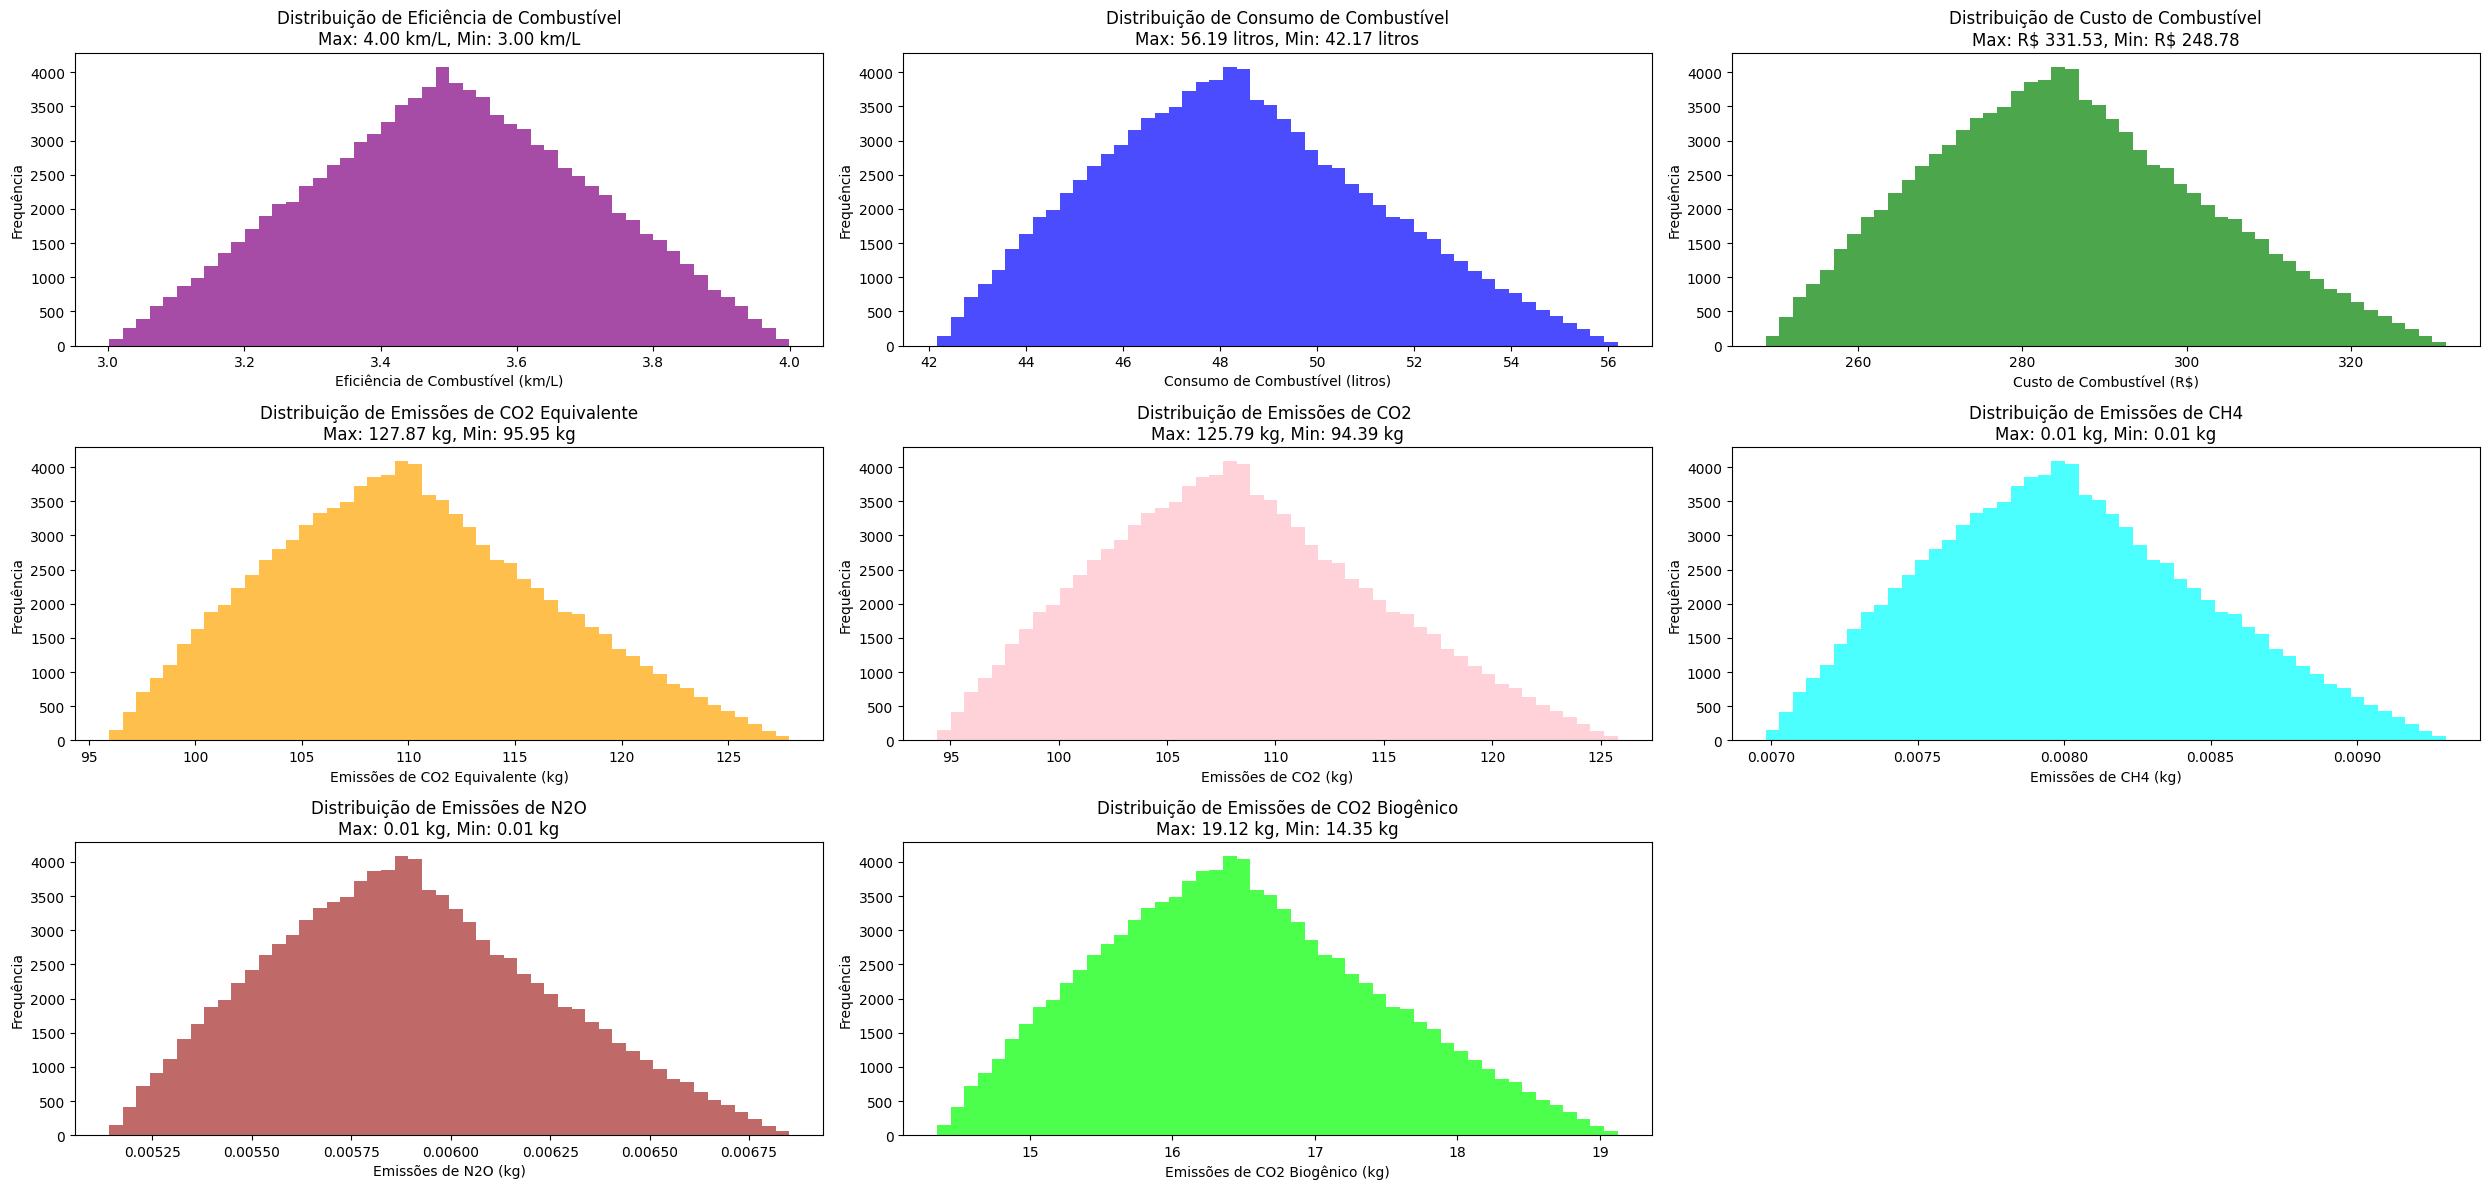

In [ ]:
 # Distribuição triangular para eficiência de combustível
a, b = 3.0, 4.0
c = (a + b) / 2  # Modo (c) sendo a média de a e b

'''for n_simulacao in n_simulacoes:
  print(f"Nº de Simulações realizadas: {n_simulacao}")
  eficiencia_triangular = np.random.triangular(a, c, b, n_simulacao)
  gera_resultado(168.64,eficiencia_triangular)
  print('\n')'''

eficiencia_triangular = np.random.triangular(a, c, b, n_simulacao)
gera_resultado(168.64,eficiencia_triangular)

### Distribuição Normal

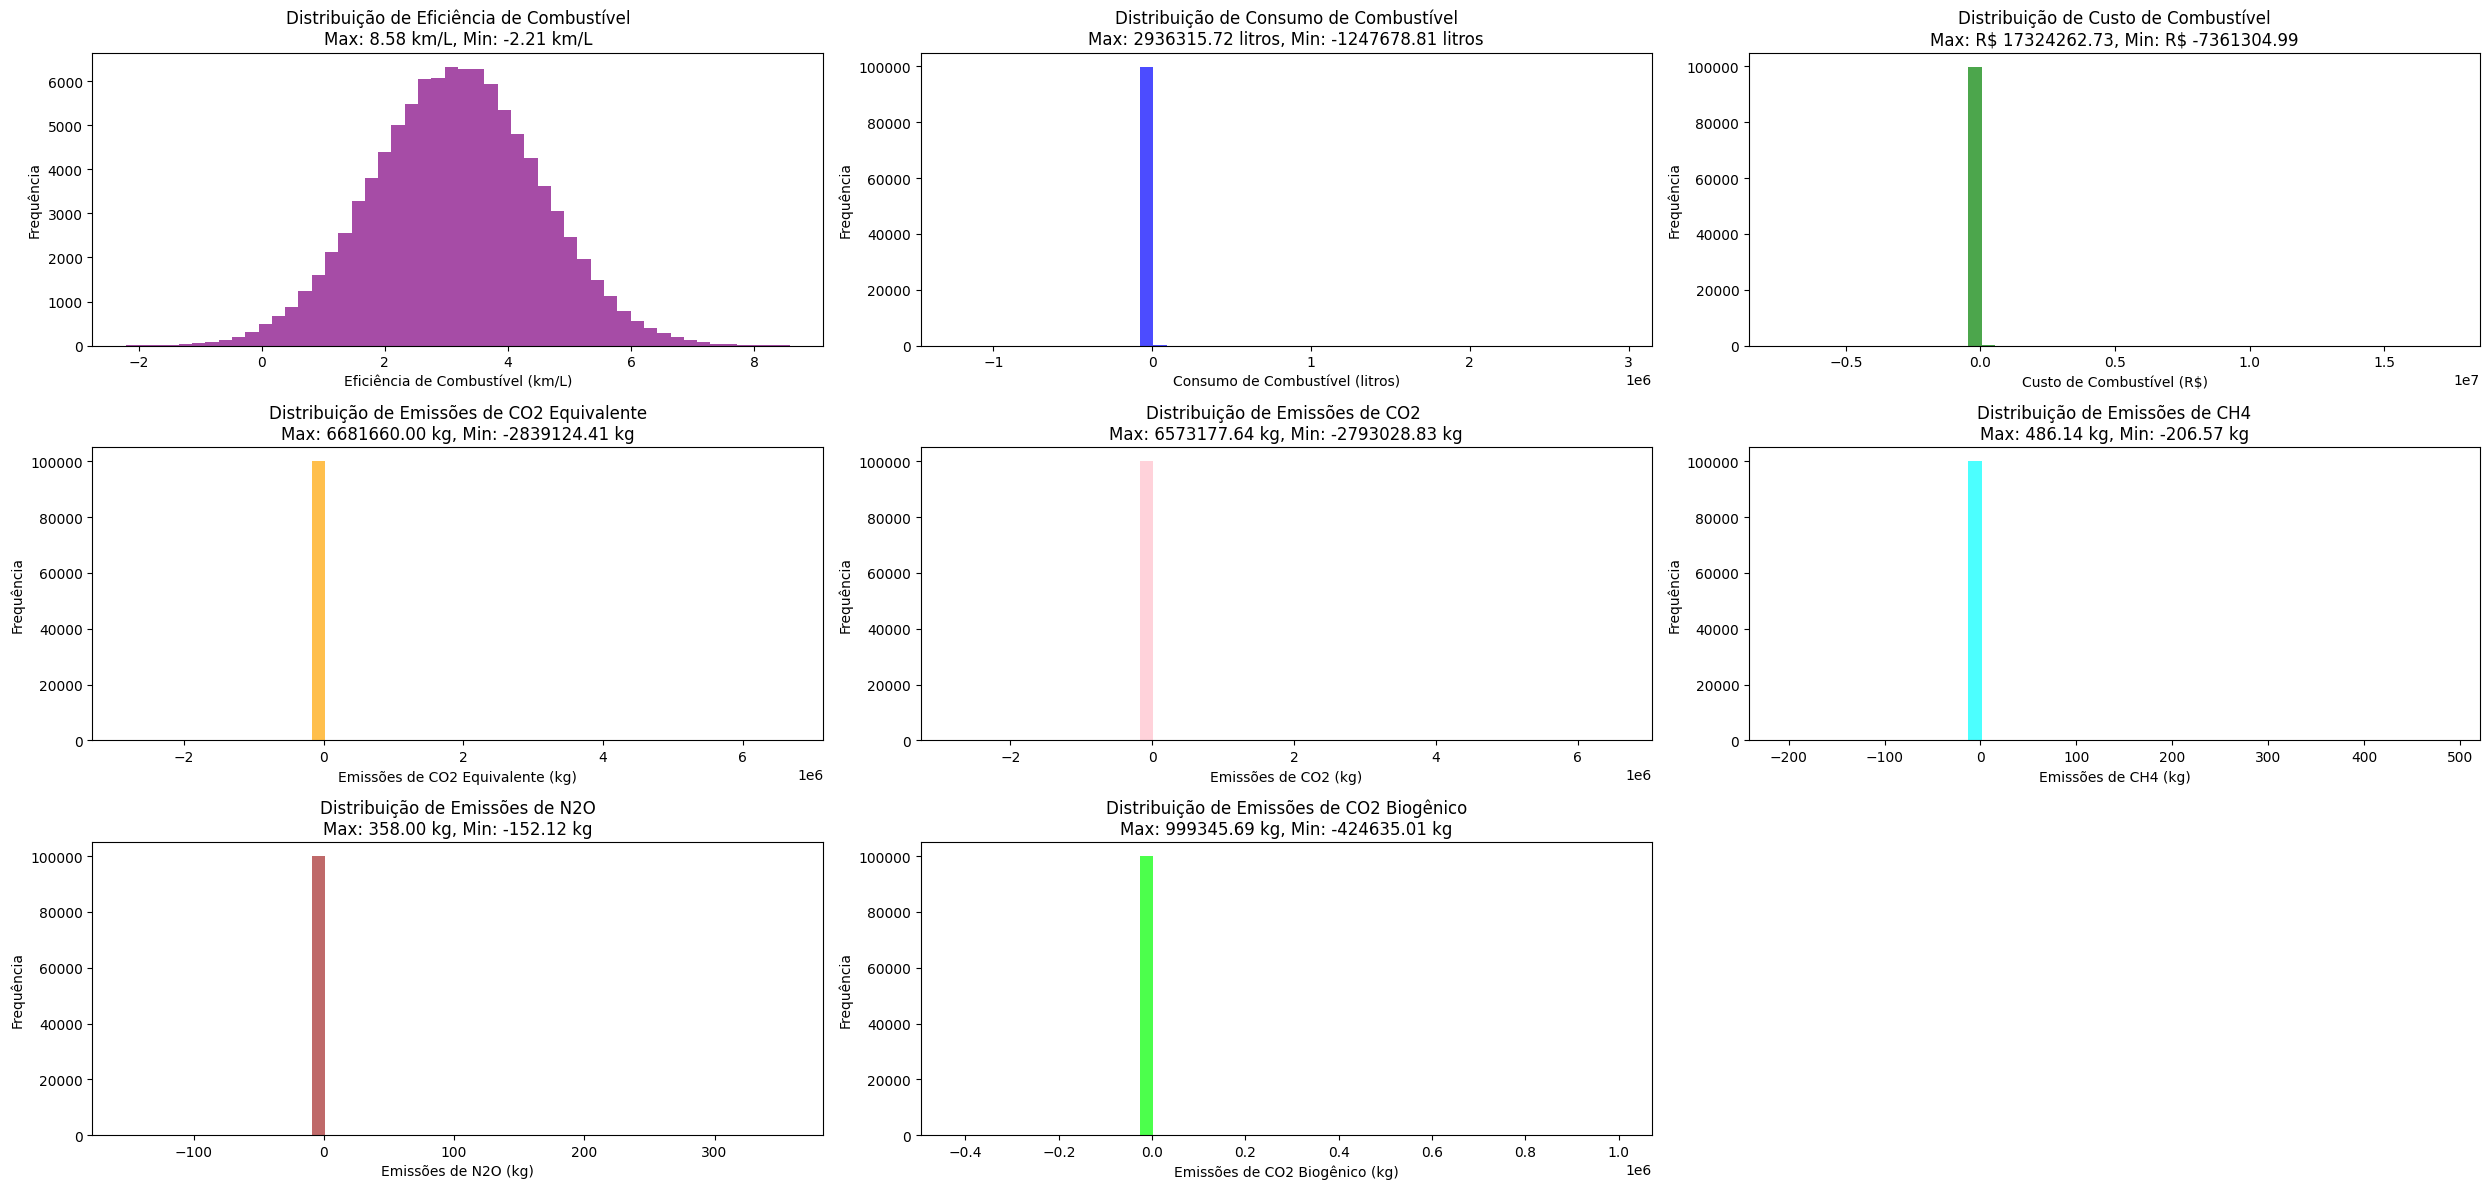

In [ ]:
#Distribuição Normal

min,max = 1.8, 4.5
desvio_padrao_eficiencia = np.std([min,max])
media_eficiencia = np.mean([min,max])

'''for n_simulacao in n_simulacoes:
  print(f"Nº de Simulações realizadas: {n_simulacao}")
  eficiencia_normal = np.random.normal(media_eficiencia, desvio_padrao_eficiencia, n_simulacao)
  gera_resultado(168.64,eficiencia_normal)
  print('\n')'''

eficiencia_normal = np.random.normal(media_eficiencia, desvio_padrao_eficiencia, n_simulacao)
gera_resultado(168.64,eficiencia_normal)

# Variando a composição do combustível

Fazer a composição do diesel variar de 7% até 21% utilizando monte carlo.

In [ ]:
# Função para separar as quantidades de diesel e de biodiesel, quando a proporção do combustível varia
def separa_combustivel_vet_novo(Q, proporcao_bio):

  '''# proporção do biodiesel no diesel
  bio_min_uniforme= 0.07
  bio_max_uniforme = 0.21
  proporcao_bio_uniforme = np.random.uniform(bio_min_uniforme, bio_max_uniforme, n_simulacao)'''

  #p_biodiesel = p
  Q_diesel, Q_biodiesel = np.zeros(len(Q)), np.zeros(len(Q))

  for i in range(len(Q)):
    Q_biodiesel[i] = Q[i] * proporcao_bio[i]
    Q_diesel[i] = Q[i]*(1-proporcao_bio[i])

  return Q_diesel, Q_biodiesel

In [ ]:
# calcula a emissão de poluentes variando também a proporção do biodiesel no diesel
def calcula_emissao_co2e_novo(Q, proporcao_bio):
  F_diesel = np.array([2.603, 0.000138531163680, 0.000138531163680]) # fator de emissão de cada gás [0] CO2, [1] Ch4, [2] N2O
  F_biodiesel = np.array([2.431, 0.000331594560, 0.00001989567360])

  G = np.array([1,  28, 265]) # Potencial de aquecimento global

  resultados_emissao_co2e = []
  resultados_c02 = []
  resultados_ch4 = []
  resultados_n2o = []
  resultados_co2_biogenico = []

  Q_diesel, Q_biodiesel = separa_combustivel_vet_novo(Q, proporcao_bio)

  # Calculando as emissões do diesel e do biodiesel
  for i in range(len(Q_diesel)):
    soma_co2 = 0
    soma_ch4 = 0
    soma_n2o = 0
    soma_co2_biogenico = 0
    total_co2e = 0

    soma_co2 += Q_diesel[i] * F_diesel[0]

    soma_ch4 += (Q_diesel[i] * F_diesel[1] + Q_biodiesel[i] * F_biodiesel[1])

    soma_n2o += (Q_diesel[i] * F_diesel[2] + Q_biodiesel[i] * F_biodiesel[2])

    soma_co2_biogenico += Q_biodiesel[i] * F_biodiesel[0]

    total_co2e +=  soma_co2 * G[0]   + soma_ch4 * G[1] + soma_n2o * G[2]


    resultados_emissao_co2e.append(total_co2e)

    resultados_co2_biogenico.append(soma_co2_biogenico)

    resultados_c02.append(soma_co2)

    resultados_ch4.append(soma_ch4)

    resultados_n2o.append(soma_n2o)

  return resultados_emissao_co2e, resultados_c02, resultados_ch4, resultados_n2o, resultados_co2_biogenico

In [ ]:
# função para obter os resultados quando variam 2 parâmetros: a eficiência e a proporção do biodiesel no diesel
def gera_resultado_novo(distancia, eficiencia_combustivel, proporcao_bio):

  # Calcular consumo de combustível
  consumo_combustivel = distancia / eficiencia_combustivel

  # Cálculo de custos
  preco_combustivel = 5.9 # preço por litro de combustível
  custo_combustivel = consumo_combustivel * preco_combustivel

  # Calcular emissões usando a função calcula_emissoes_co2e
  emissoes_co2e, emissoes_co2, emissoes_ch4, emissoes_n2o, emissoes_co2_biogenico = calcula_emissao_co2e_novo(consumo_combustivel, proporcao_bio)

  # Calcular valores máximo e mínimo
  max_eficiencia, min_eficiencia = retorna_max_min(eficiencia_combustivel)
  max_consumo, min_consumo = retorna_max_min(consumo_combustivel)
  max_custo, min_custo = retorna_max_min(custo_combustivel)
  max_co2e,  min_co2e = retorna_max_min(emissoes_co2e)
  max_co2, min_co2 = retorna_max_min(emissoes_co2)
  max_ch4, min_ch4 = retorna_max_min(emissoes_ch4)
  max_n2o, min_n2o = retorna_max_min(emissoes_n2o)
  max_co2_biogenico, min_co2_biogenico = retorna_max_min(emissoes_co2_biogenico)
  max_biodiesel, min_biodiesel = retorna_max_min(proporcao_bio)


  # Plotar os gráficos
  plt.figure(figsize=(25, 12))

  # Gráfico de Eficiência de Combustível
  plt.subplot(3, 3, 1)
  plt.hist(eficiencia_combustivel, bins=50, color='purple', alpha=0.7)
  plt.xlabel('Eficiência de Combustível (km/L)')
  plt.ylabel('Frequência')
  plt.title('Distribuição de Eficiência de Combustível\nMax: {:.2f} km/L, Min: {:.2f} km/L'.format(max_eficiencia, min_eficiencia))

  # Gráfico de Consumo de Combustível
  plt.subplot(3, 3, 2)
  plt.hist(consumo_combustivel, bins=50, color='blue', alpha=0.7)
  plt.xlabel('Consumo de Combustível (litros)')
  plt.ylabel('Frequência')
  plt.title('Distribuição de Consumo de Combustível\nMax: {:.2f} litros, Min: {:.2f} litros'.format(max_consumo, min_consumo))

  # Gráfico de Custo de Combustível
  plt.subplot(3, 3, 3)
  plt.hist(custo_combustivel, bins=50, color='green', alpha=0.7)
  plt.xlabel('Custo de Combustível (R\$)')
  plt.ylabel('Frequência')
  plt.title('Distribuição de Custo de Combustível\nMax: R\$ {:.2f}, Min: R\$ {:.2f}'.format(max_custo, min_custo))

  # Gráfico da proporção do biodiesel adicionada ao diesel
  plt.subplot(3, 3, 4)
  plt.hist(proporcao_bio, bins=50, alpha=0.7)
  plt.xlabel('Proporção do Biodiesel no litro do Diesel')
  plt.ylabel('Frequência')
  plt.title('Proporção do Biodiesel no litro do Diesel \nMax: {:.2f}, Min: {:.2f}'.format(max_biodiesel, min_biodiesel))

  # Gráfico de Emissões de CO2 Equivalente
  plt.subplot(3, 3, 5)
  plt.hist(emissoes_co2e, bins=50, color='orange', alpha=0.7)
  plt.xlabel('Emissões de CO2 Equivalente (kg)')
  plt.ylabel('Frequência')
  plt.title('Distribuição de Emissões de CO2 Equivalente\nMax: {:.2f} kg, Min: {:.2f} kg'.format(max_co2e, min_co2e))


  # Gráfico de Emissões de CO2
  plt.subplot(3, 3, 6)
  plt.hist(emissoes_co2, bins=50, color='pink', alpha=0.7)
  plt.xlabel('Emissões de CO2 (kg)')
  plt.ylabel('Frequência')
  plt.title('Distribuição de Emissões de CO2 \nMax: {:.2f} kg, Min: {:.2f} kg'.format(max_co2, min_co2))

  # Gráfico de Emissões de CH4
  plt.subplot(3, 3, 7)
  plt.hist(emissoes_ch4, bins=50, color='cyan', alpha=0.7)
  plt.xlabel('Emissões de CH4 (kg)')
  plt.ylabel('Frequência')
  plt.title('Distribuição de Emissões de CH4\nMax: {:.2f} kg, Min: {:.2f} kg'.format(max_ch4, min_ch4))

  # Gráfico de Emissões de N2O
  plt.subplot(3, 3, 8)
  plt.hist(emissoes_n2o, bins=50, color='brown', alpha=0.7)
  plt.xlabel('Emissões de N2O (kg)')
  plt.ylabel('Frequência')
  plt.title('Distribuição de Emissões de N2O\nMax: {:.2f} kg, Min: {:.2f} kg'.format(max_n2o, min_n2o))

  # Gráfico de Emissões de N2O
  plt.subplot(3, 3, 9)
  plt.hist(emissoes_co2_biogenico, bins=50, color='lime', alpha=0.7)
  plt.xlabel('Emissões de CO2 Biogênico (kg)')
  plt.ylabel('Frequência')
  plt.title('Distribuição de Emissões de CO2 Biogênico\nMax: {:.2f} kg, Min: {:.2f} kg'.format(max_co2_biogenico, min_co2_biogenico))

  # Ajustar layout e mostrar os gráficos
  plt.tight_layout()
  plt.show()

## Obtendo os resultados

### Distribuição Uniforme

In [ ]:
'''n_teste = 100000
eficiencia_teste_uniforme = np.random.uniform(uniform_min, uniform_max, n_teste)'''

In [ ]:
# proporção de biodiesel no diesel
min_biodiesel, max_biodiesel = 0.07, 0.21
proporcao_bio_uniforme = np.random.uniform(min_biodiesel, max_biodiesel, n_simulacao)

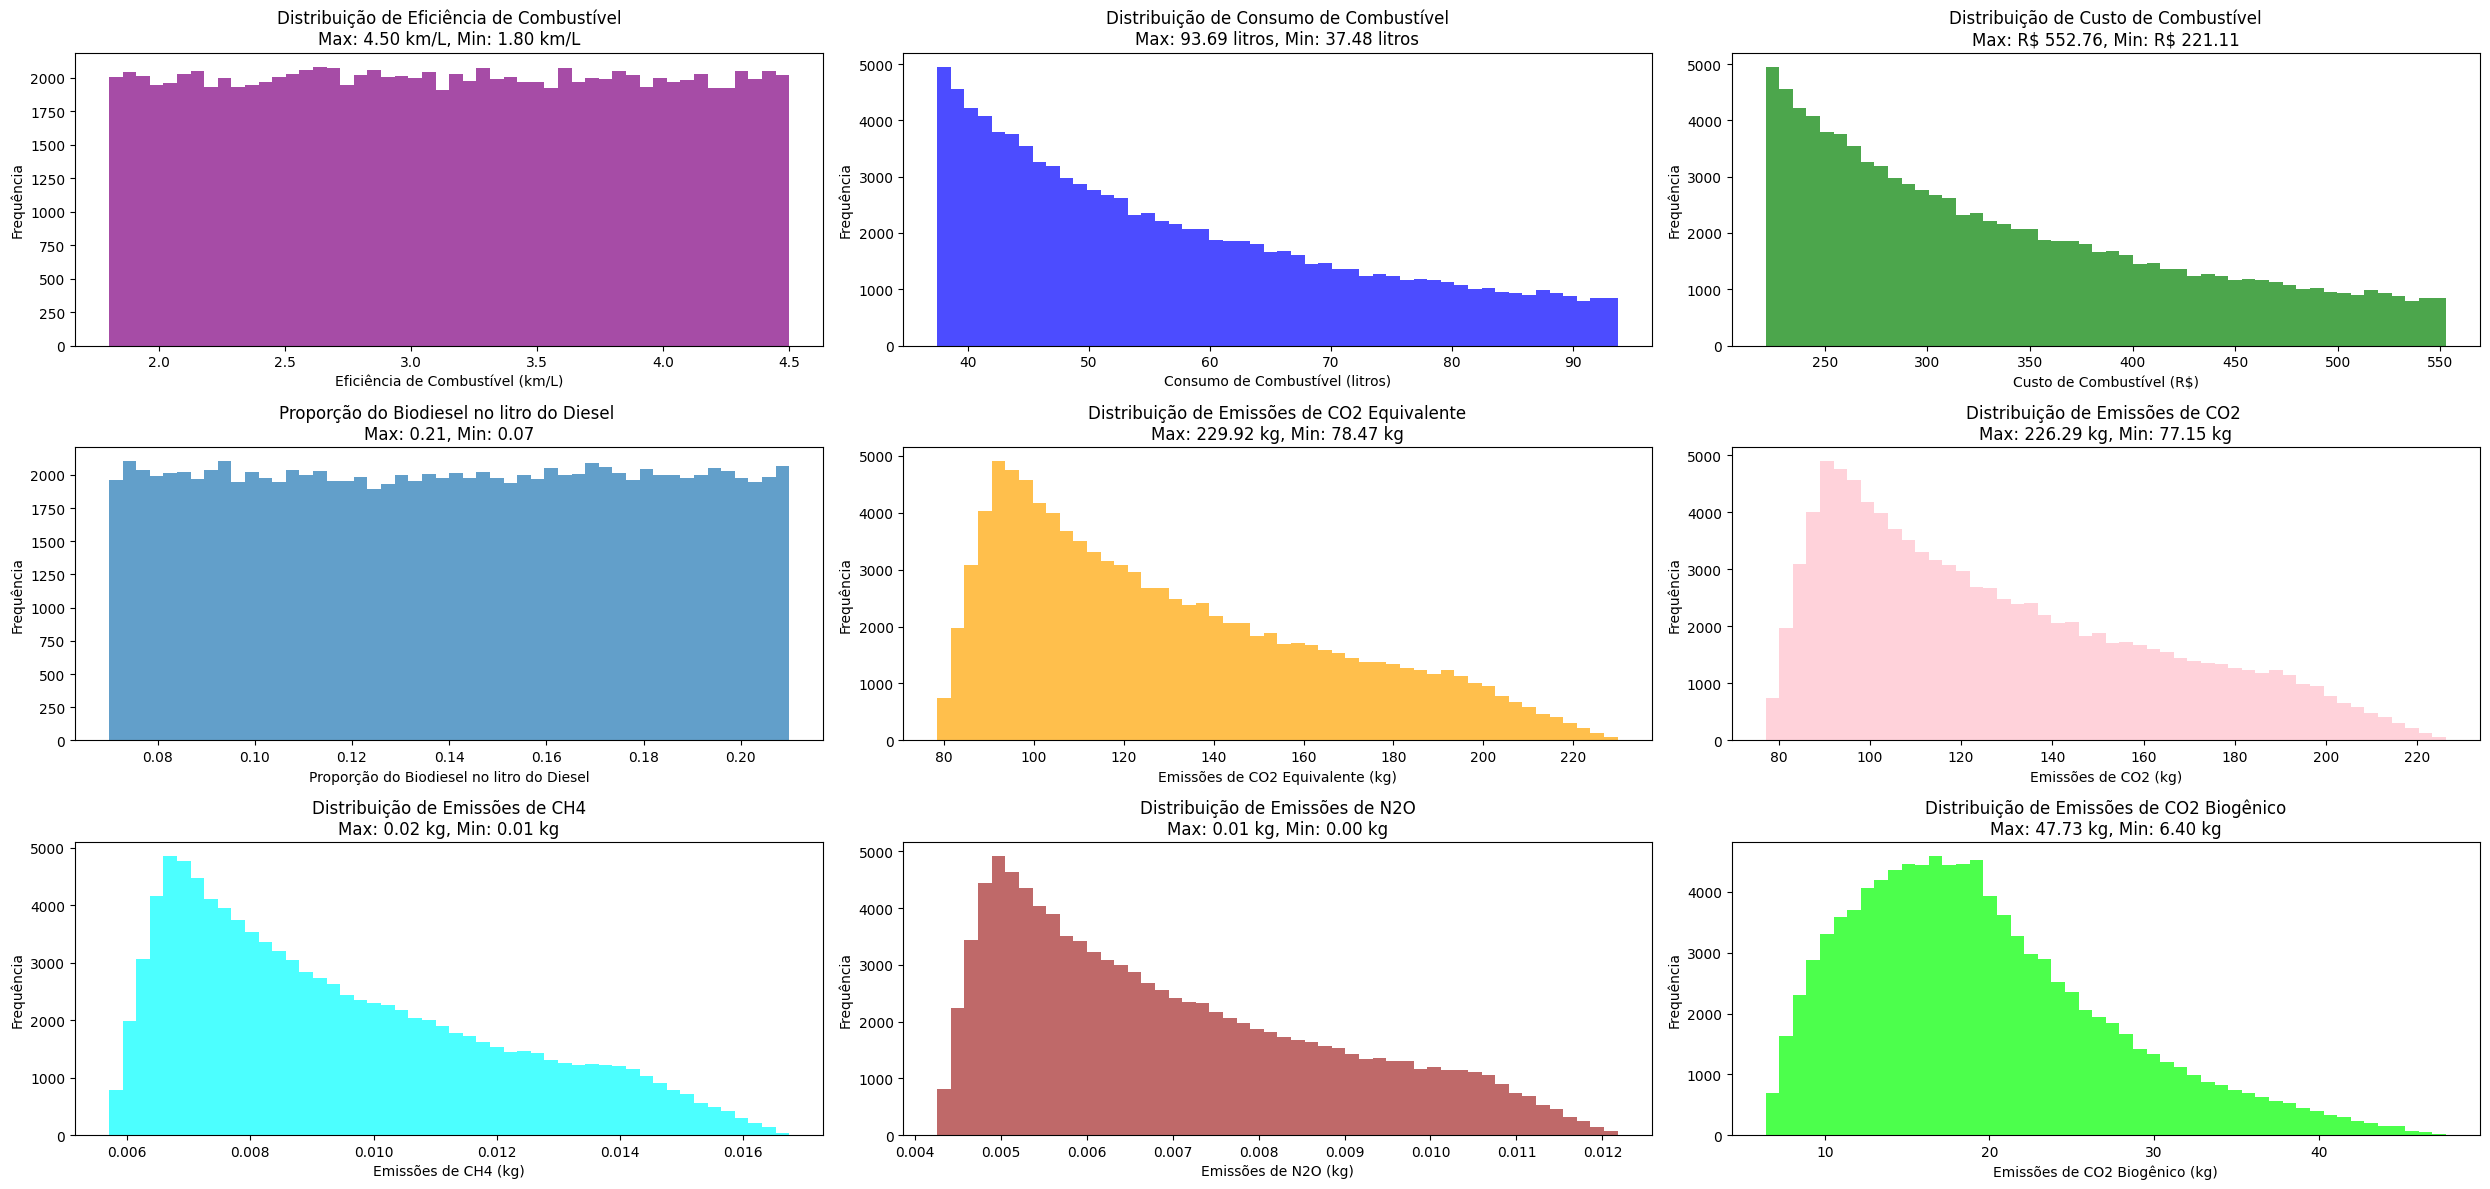

In [ ]:
gera_resultado_novo(168.64,eficiencia_uniforme, proporcao_bio_uniforme)

### Distribuição Normal

In [ ]:
desvio_padrao_proporcao_bio = np.std([min_biodiesel, max_biodiesel])
media_proporcao_bio= np.mean([min_biodiesel, max_biodiesel])

In [ ]:
eficiencia_normal

array([3.84544958, 3.20173198, 4.08324613, ..., 3.2921788 , 3.80177506,
       4.12559547])

In [ ]:
proporcao_bio_normal = np.random.normal(media_proporcao_bio, desvio_padrao_proporcao_bio, n_simulacao)

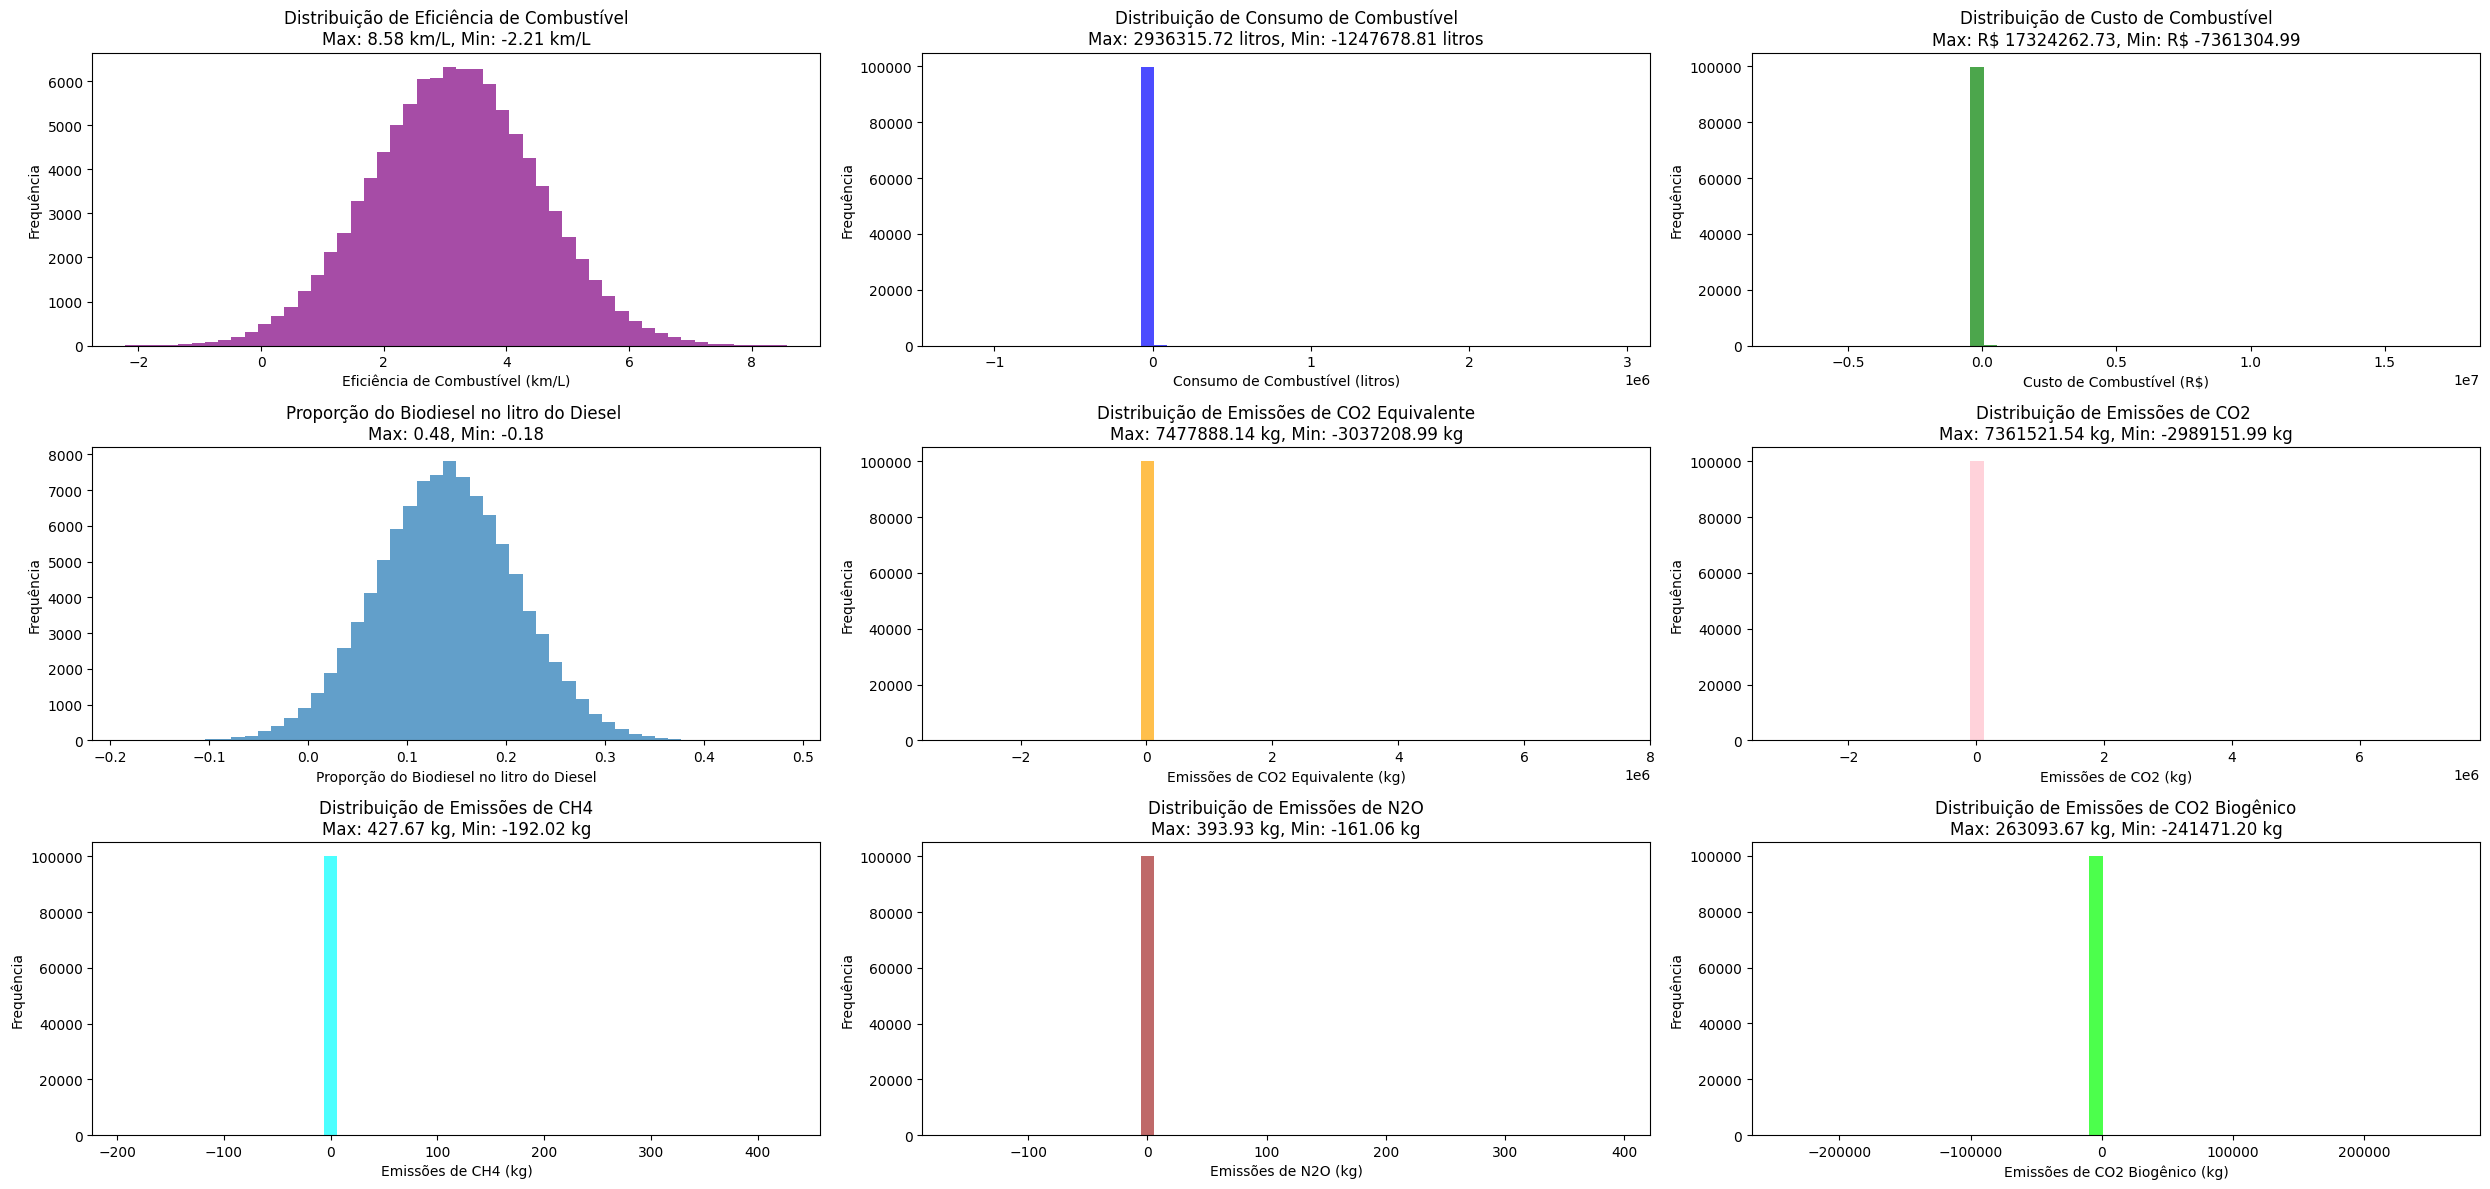

In [ ]:
gera_resultado_novo(168.64,eficiencia_normal,proporcao_bio_normal)